<a href="https://colab.research.google.com/github/DivyaDariniSivabalan/TDS-AVENUE-CODEFORGE/blob/main/TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
from google.colab import files
u = files.upload()

Saving tested.csv to tested (2).csv


In [55]:
df=pd.read_csv('tested.csv')

In [56]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [58]:
df.shape

(418, 12)

In [59]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [60]:
df['Fare'].fillna(df['Fare'].median(),inplace=True)

In [61]:
df['Cabin'].fillna(df['Cabin'].mode()[0],inplace=True)

In [62]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


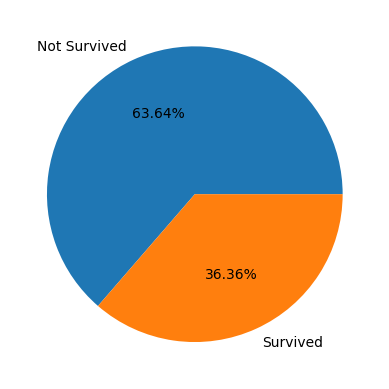

In [63]:
plt.pie(df['Survived'].value_counts(),labels=['Not Survived','Survived'],autopct='%1.2f%%')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

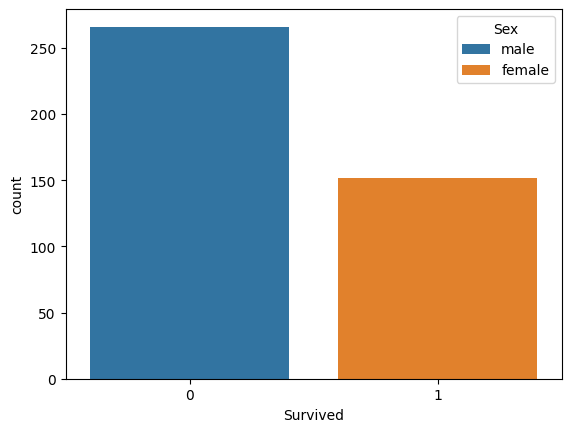

In [64]:
sns.countplot(x='Survived',hue='Sex',data=df)

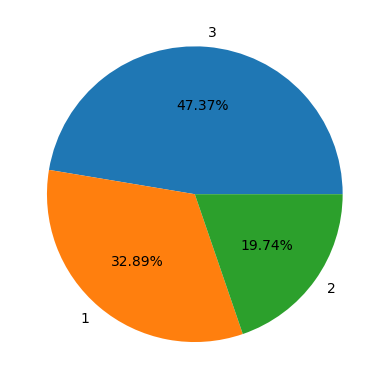

In [65]:
a = df[df['Sex'] == 'female']['Pclass'].value_counts()
plt.pie(a,labels=a.index,autopct='%1.2f%%')
plt.show()

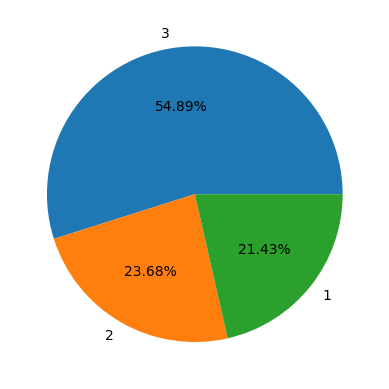

In [66]:
b=df[df['Sex']=='male']['Pclass'].value_counts()
plt.pie(b,labels=b.index,autopct='%1.2f%%')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Survived', ylabel='Age'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


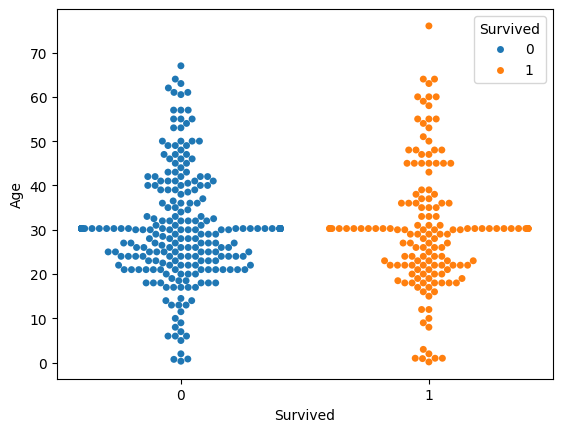

In [67]:
sns.swarmplot(x='Survived',y='Age',data=df,hue = 'Survived' )

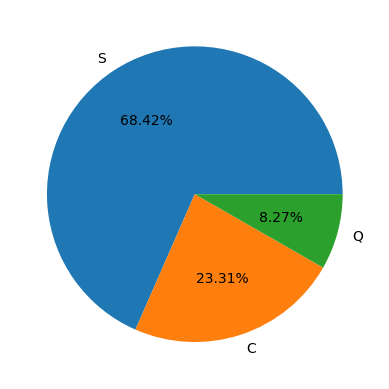

In [68]:
c = df[df['Sex']=='male']['Embarked'].value_counts()
plt.pie(c,labels=c.index,autopct='%1.2f%%')
plt.show()

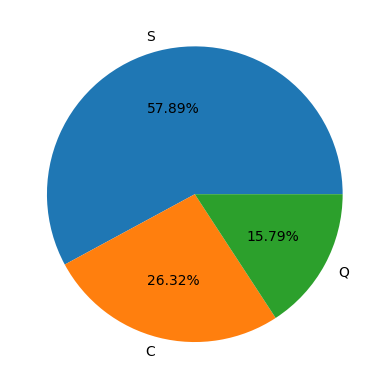

In [69]:
d = df[df['Sex']=='female']['Embarked'].value_counts()
plt.pie(d,labels=d.index,autopct='%1.2f%%')
plt.show()

In [70]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df, test_size=0.2, random_state=0)
predictors = df.drop(['Survived', 'PassengerId'], axis=1)
target = df["Survived"]
x_train, x_val, y_train, y_val = train_test_split(
    predictors, target, test_size=0.2, random_state=0)

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

randomforest = RandomForestClassifier()

combined_data = pd.concat([x_train, x_val])
combined_data = pd.get_dummies(combined_data)

x_train = combined_data[:len(x_train)]
x_val = combined_data[len(x_train):]

randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)

acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

100.0
